In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('imgs/ukbench00000.jpg', cv2.IMREAD_COLOR)

In [59]:
def calcColorHistCV2(img, mask, histSize, ranges):
    if isinstance(histSize, int):
        histSize = [histSize]
        
    hist_blue  = cv2.calcHist([img], channels=[0], mask=mask, histSize=histSize, ranges=ranges).reshape(-1)
    hist_green = cv2.calcHist([img], channels=[1], mask=mask, histSize=histSize, ranges=ranges).reshape(-1)
    hist_red   = cv2.calcHist([img], channels=[2], mask=mask, histSize=histSize, ranges=ranges).reshape(-1)
    
    hist_color = np.concatenate((hist_blue, hist_green, hist_red))
    return hist_color

In [60]:
def calcColorHist(img, mask, histSize, ranges):        
    hist_blue, _  = calcHist(img, channel=0, mask=mask, histSize=histSize, ranges=ranges)
    hist_green, _ = calcHist(img, channel=1, mask=mask, histSize=histSize, ranges=ranges)
    hist_red, _   = calcHist(img, channel=2, mask=mask, histSize=histSize, ranges=ranges)
    
    hist_color = np.concatenate((hist_blue, hist_green, hist_red))
    return hist_color

In [78]:
def calcHist(img, channel, mask, histSize, ranges):
    left_boundary, right_boundary = ranges
    bin_width = (right_boundary - left_boundary) / histSize
    
    data = img[..., channel]
    if mask:
        data = data[mask]
    
    # inclusive left, exclusive right
    data = data[np.logical_and(left_boundary <= data, data < right_boundary)]
    
    ticks = np.linspace(start=left_boundary, stop=right_boundary, num=histSize+1) # number of bins = number of ticks - 1
    intervals = np.stack((ticks[:-1], ticks[1:]), axis=-1)
    
    # shift and stretch domain, so that floor gives sequence number (= bin number)
    data = ((data - left_boundary) / bin_width).astype(np.int32)
    
    bin_counts = np.zeros(histSize, dtype=np.float32)
    bin_numbers, nonzero_bin_counts = np.unique(data, return_counts=True)
    bin_counts[bin_numbers] = nonzero_bin_counts
    
    return bin_counts, intervals

In [79]:
ff = calcColorHistCV2(img, None, 256, [0, 256])

In [83]:
ff2 = calcColorHist(img, None, 256, [0, 256])

In [85]:
np.all(ff == ff2)

True

In [81]:
ff.dtype

dtype('float32')

In [65]:
np.all(calcColorHistCV2(img, None, 256, [0, 256]) == calcColorHist(img, None, 256, [0, 256]))

True

In [51]:
bin_counts, intervals = calcHist(img, 0, None, 256, [0, 256])

In [54]:
hist_blue  = cv2.calcHist([img], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
hist_green = cv2.calcHist([img], channels=[1], mask=None, histSize=[256], ranges=[0, 256])
hist_red   = cv2.calcHist([img], channels=[2], mask=None, histSize=[256], ranges=[0, 256])

In [33]:
x = np.array(range(256))

In [20]:
hist.shape

(256, 1)

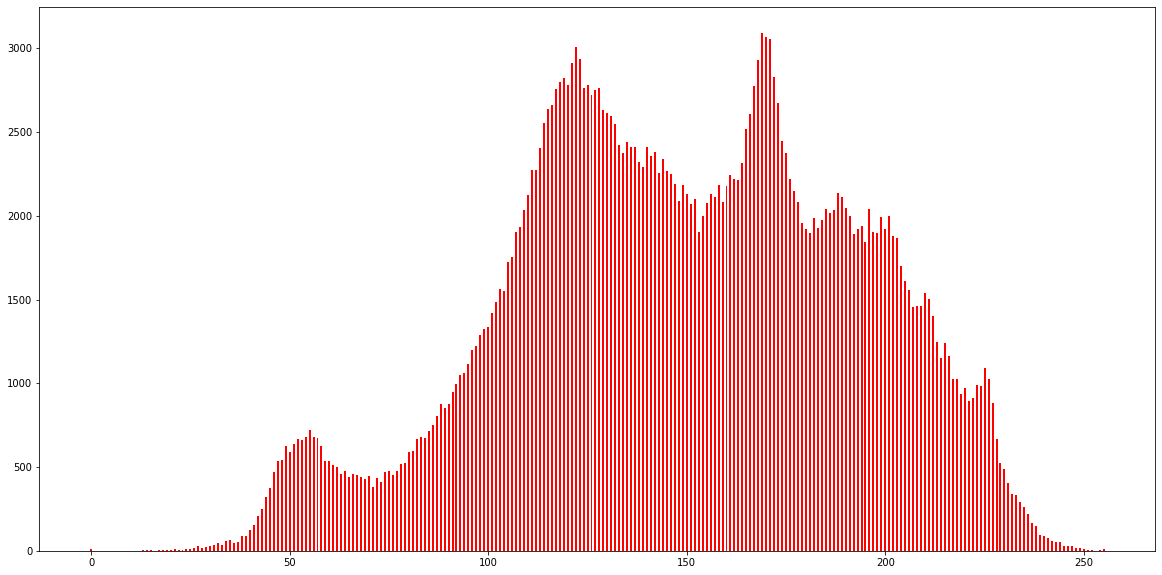

In [35]:
plt.figure(figsize=(20,10))
plt.bar(x=x, height=hist.reshape(-1), width=0.5, color='red');

In [24]:
np.where(hist==0)

(array([1, 3, 4, 6, 7, 9]), array([0, 0, 0, 0, 0, 0]))